In [61]:
import pandas as pd
# pd.set_option('max_colwidth', 50)
# set this if you need to

In [62]:
# cagatay: adding the following in the beginning as will be necessary further down
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [63]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str})
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [64]:
businesses.shape # get a quick idea of how many businesses we have

(7544, 16)

In [65]:
id_counts = businesses.business_id.value_counts() # how many times does each business_id appear?
repeat_ids = id_counts[id_counts > 1].index # find the business_ids that repeat
print '%d business_ids are repeated. Here they are:' % len(repeat_ids)
businesses[businesses.business_id.isin(repeat_ids)]

15 business_ids are repeated. Here they are:


,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
1022,3543,Penang Garden Restaurant,728 Washington St,San Francisco,94108,37.795288,-122.405543,NaN,H26,NaN,07/26/2004,Lamps of China Inc,728 Washington St,San Francisco,CA,94108
1023,3543,Penang Garden Restaurant,728 Washington St,San Francisco,94108,37.795288,-122.405543,NaN,H26,NaN,07/26/2004,"Fortune Family Six, Inc",728 Washington St,San Francisco,CA,94108
1030,3566,Mandalay Restaurant,4348 California Street,SAN FRANCISCO,94118,37.785117,-122.464041,NaN,H26,NaN,03/31/2005,SANDRA TUNG,4348 CALIFORNIA ST,SF,CA,94118
1031,3566,Mandalay Restaurant,4348 California Street,SAN FRANCISCO,94118,37.785117,-122.464041,NaN,H26,379754.0,03/31/2005,GOLDEN MANDALAY INC,4348 CALIFORNIA ST,SF,CA,94118
1562,5301,Tacos San Buena,2598 Harrison St,S.F.,94110,37.749851,-122.415121,+14155550404,H79,NaN,NaN,"SANTANA , ESQUIVEL",2598 HARRISON ST,S.F.,CA,94110
1563,5301,Tacos San Buena,2598 Harrison St,S.F.,94110,37.749851,-122.415121,+14155550404,H79,NaN,NaN,"Santana, Esquivel",180 Nyla Ave.,SSF,CA,94080
1759,5830,Theodore Roosevelt Middle School,460 Arguello Blvd,S.F.,94118,37.782383,-122.458926,+14155758446,H91,NaN,NaN,SFUSD,NaN,NaN,NaN,NaN
1760,5830,Theodore Roosevelt Middle School,460 Arguello Blvd,S.F.,94118,37.782383,-122.458926,+14155758446,H91,NaN,NaN,San Francisco Unified School District,460 Arguello Blvd.,San Francisco,CA,94118
2435,9463,Roli Roti,Ferry Building,San Francisco,94111,37.795184,-122.393819,NaN,H78,NaN,NaN,"Rotisystems, Inc",Ferry Building,San Francisco,CA,94111
2436,9463,Roli Roti,Ferry Building,San Francisco,94111,37.795184,-122.393819,NaN,H78,375149.0,NaN,"Odermatt, Thomas",7800 Edgewater Dr,Oakland,CA,94621


In [66]:
# looks like 15 businesses are repeated
# for each business_id, I decided to keep only the first row it appears
businesses = businesses.drop_duplicates('business_id')

In [67]:
# now we have fewer rows
businesses.shape

(7527, 16)

In [68]:
# confirm that no business_id appears more than once now
businesses.business_id.value_counts().head()

2047     1
77191    1
83314    1
3443     1
79220    1
Name: business_id, dtype: int64

In [69]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [73]:
inspections.shape

(27285, 4)

In [74]:
# quick look at the missing value situation
inspections.isnull().sum()

business_id        0
Score          12022
date               0
type               0
dtype: int64

In [75]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [76]:
violations.shape

(39720, 5)

In [77]:
# quick look at the missing value situation
violations.isnull().sum()

business_id         0
date                0
ViolationTypeID     0
risk_category      10
description        10
dtype: int64

In [78]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [79]:
# merge the first two dataframes on the column business_id. 
# I decided to do an inner join. This means if the business_id doesn't appear in inspections I don't include it. Similary
# if there is an inspection for which the business_id is not found in businesses, I don't include that inspection either.
business_inspections = pd.merge(businesses, inspections, on='business_id')

# next we merge business_inspections with violations
# there is no feature like, say inspection_id, so I decided to join the two dataframes on the columns they share
# they share two columns: business_id, date
restaurant_scores = pd.merge(business_inspections, violations, on = ['business_id','date'])


In [81]:
# quick look to check whether we get what we wanted
restaurant_scores[['business_id','date','ViolationTypeID']].head(10)

,business_id,date,ViolationTypeID
0,10,20140729,103129
1,10,20140729,103144
2,10,20140114,103154
3,10,20140114,103119
4,10,20140114,103145
5,19,20141110,103145
6,19,20141110,103116
7,19,20140214,103156
8,19,20140214,103124
9,19,20130904,103133


In [82]:
# 2 Which ten business have had the most inspections?b

In [83]:
# this one looks at the name. But note that several business_ids may share the same name
business_inspections.name.value_counts().head(10)

Peet's Coffee & Tea           87
Starbucks Coffee              71
Whole Foods Market            54
STARBUCKS                     49
Specialty's Cafe & Bakery     48
STARBUCKS COFFEE              44
San Francisco Soup Company    44
KENTUCKY FRIED CHICKEN        32
Lee's Deli                    31
Subway Sandwiches             31
Name: name, dtype: int64

In [84]:
# let's look at by business_id
a = business_inspections.business_id.value_counts().head(10)
print a

1775     21
2505     20
74374    20
71804    19
67154    19
74131    19
71618    19
7747     18
489      18
80243    17
Name: business_id, dtype: int64


In [85]:
# let's also display these top ten businesses
businesses[businesses.business_id.isin(a.index)]

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
141,489,Dol-Ho Restaurant,808 Pacific Ave,San Francisco,94133,37.796718,-122.408714,NaN,H24,203720.0,NaN,Yiu Tim Chan,808 Pacific Ave,San Francisco,CA,94133
463,1775,Sapporo-Ya,1581 WEBSTER St,SF,94115,37.785227,-122.431472,+14155567400,H25,98407.0,NaN,TURNER SHIBATA INC.,1581 WEBSTER ST,SF,CA,94115
679,2505,AMERICANA GRILL & FOUNTAIN,3532 BALBOA St,SF,94121,37.775806,-122.496608,NaN,H25,315912.0,05/01/1998,"LAI, TONY",3532 BALBOA ST,SF,CA,94121
2345,7747,SAFEWAY STORE #964,4950 Mission St,SF,94112,37.719540,-122.438775,+14155587200,H10,24669.0,NaN,"SAFEWAY STORES, INC.",4950 MISSION ST,SF,CA,94112
4349,67154,RIVERSIDE SEAFOOD RESTAURANT,1201 VICENTE St,SF,94116,37.739065,-122.479769,NaN,H26,462782.0,08/26/2011,E & S SUNSET GROUP INC.,1201 VICENTE ST.,SAN FRANCISCO,CA,94116
5123,71618,Rustic,3331 24th St,SF,94110,37.752183,-122.419128,+14155551452,H24,478833.0,05/15/2013,Triumverant Pizza LLC,540 Pacific Ave.,San Francisco,CA,94109
5154,71804,La Urbana,661 Divisadero St,NaN,94117,NaN,NaN,NaN,H26,473460.0,02/27/2013,"Latin Hospitality Group, LLC",1864 Fell St.,SF,CA,94117
5252,74131,Deena's Market and Smoke Shop,600 O'Farrell St,NaN,94109,NaN,NaN,NaN,H28,478185.0,04/11/2013,Mouhannad Dahbour and Ebrahim Alghazaly,600 O'Farrell St,SF,CA,94109
5289,74374,Gallardo's Mexican Restaurant,3248 18th St,NaN,94110,NaN,NaN,NaN,H25,430241.0,04/26/2013,Juan Manuel Gallardo,3248 18th Street,SF,CA,94110
6286,80243,New Wing Lee LLC,700 Clement St,NaN,94118,NaN,NaN,NaN,H25,1004730.0,09/03/2014,New Wing Lee LLC,700 Clement St.,Sf,CA,94118


In [86]:
# 3 Group and count the inspections by type

In [87]:
inspections['type'].value_counts()

Routine - Unscheduled                15481
Reinspection/Followup                 5386
New Ownership                         1877
Complaint                             1634
New Construction                      1613
Non-inspection site visit              840
Complaint Reinspection/Followup        163
Structural Inspection                  120
Foodborne Illness Investigation        100
Routine - Scheduled                     63
Administrative or Document Review        4
Special Event                            2
Multi-agency Investigation               2
Name: type, dtype: int64

In [88]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [89]:
# the data column contains numeric values such as 20140819
# convert to string, slice to extract the month part, convert back to numeric
# store the new value as a new column called month
inspections['month'] = inspections.date.astype(str).apply(lambda x: x[4:6]).astype(int)

# do the same for year
inspections['year'] = inspections.date.astype(str).apply(lambda x: x[:4]).astype(int)


In [90]:
# prepare a series for plotting
s = inspections.month.value_counts().sort_index()
s

1     1940
2     2277
3     2833
4     2732
5     2592
6     2507
7     1971
8     2420
9     2424
10    2285
11    1784
12    1520
Name: month, dtype: int64

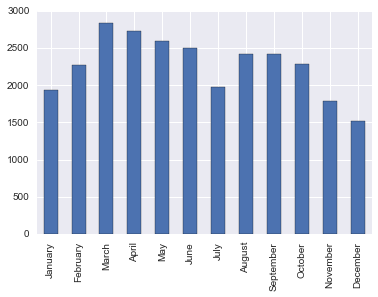

In [91]:
# I'd like to use month names instead of numbers when plotting the bar graph
new_index = ['January','February','March','April','May','June','July','August',\
               'September','October','November','December']

s.index = new_index
s.plot(kind = 'bar')

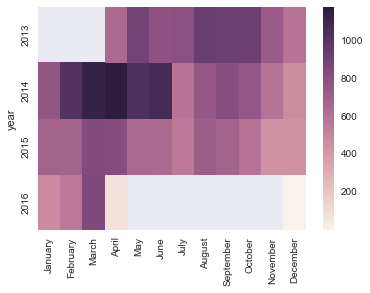

In [92]:
# next, I'll try to do the heat map
# I assumed that we're asked to do a break-down by months for each year

insp_year_month = inspections.groupby(['year','month']).business_id.count()

# for heatmap, we'll turn this into a matrix
matrix_for_heatmap = insp_year_month.unstack()

# again, instead of numbers use month names. we had already created a list of month names and stored 
# in new_index in the above cell
matrix_for_heatmap.columns = new_index

# now we're ready for plotting heatmap
sns.heatmap(matrix_for_heatmap)

In [93]:
# 5 Which zip code contains the most high risk violations?

In [94]:
# for this one, I'll join businesses and violations. To make things simple, I'll only use the business_id and owner_zip columns
# from businesses
violations_zip = pd.merge(businesses[['business_id','owner_zip']], violations, on = 'business_id')

violations_zip[violations_zip.risk_category == 'High Risk'].owner_zip.value_counts().head(5)

94133    443
94110    383
94109    365
94122    352
94102    268
Name: owner_zip, dtype: int64

In [356]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

In [95]:
# I couldn't do this question. Since it's the violations, not inspections, that are categorized, how should we label an inspection? 
# The problem is each inspection may result in several violations.
# Unfortunately I had to start working on the homework late, and I didn't have time to ask this. 

In [96]:
# 7 Examining the descriptions, what is the most common violation?

In [97]:
# for this question, we only need the violations dataframe
violations.description.value_counts().head(1)

Unclean or degraded floors walls or ceilings    3395
Name: description, dtype: int64

In [98]:
# 8 Create a hist of the scores with 10 bins

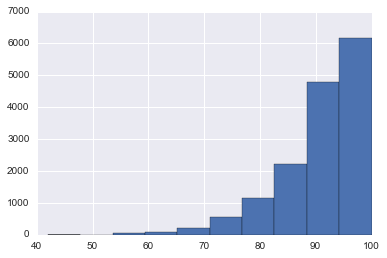

In [99]:
inspections.Score.hist(bins=10)

In [362]:
# 9 Can you predict risk category based on the other features in this dataset?

In [100]:
# Unfortunately, I didn't have time to work on this question.

In [101]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [102]:
# Unfortunately, I didn't have time to work on this question.

In [103]:
############################
### A Little More Morbid ###
############################

In [104]:
killings = pd.read_csv('./data/police-killings.csv')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [105]:
# some quick checks 
print killings.shape
print killings.columns
killings.isnull().sum()

(467, 15)
Index([u'Unnamed: 0', u'name', u'age', u'gender', u'raceethnicity', u'month',
       u'day', u'year', u'streetaddress', u'city', u'state',
       u'lawenforcementagency', u'cause', u'armed', u'county_income'],
      dtype='object')


Unnamed: 0              0
name                    0
age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
year                    0
streetaddress           4
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
county_income           0
dtype: int64

In [106]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [107]:
killings.rename(columns = {'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

In [108]:
# let's check if it worked
print killings.columns

Index([u'Unnamed: 0', u'name', u'age', u'gender', u'race', u'month', u'day',
       u'year', u'streetaddress', u'city', u'state', u'agency', u'cause',
       u'armed', u'county_income'],
      dtype='object')


In [109]:
# 2. Show the count of missing values in each column

In [110]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [111]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [112]:
killings.fillna('Unknown', inplace=True)

In [113]:
# let's see if it worked
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    0
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [114]:
# 4. How many killings were there so far in 2015?

In [115]:
killings[killings.year == 2015].name.count()
# Answer: 467 killings

467

In [116]:
# 5. Of all killings, how many were male and how many female?

In [117]:
killings.gender.value_counts()

# Answer: 445 were male, 22 were female

Male      445
Female     22
Name: gender, dtype: int64

In [118]:
# 6. How many killings were of unarmed people?

In [119]:
killings.armed.value_counts()

# Answer: 102 were unarmed. (Note: there are 7 Unknown, and 2 Disputed)

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [120]:
# 7. What percentage of all killings were unarmed?

In [122]:
a = sum(killings.armed == 'No')

b = killings.armed.count()

c = 100 * float(a)/b

print '%.2f percent were unarmed' % c

# Answer: ~21.84% were unarmed

21.84 percent were unarmed


In [123]:
# 8. What are the 5 states with the most killings?

In [124]:
killings.state.value_counts().head(5)

# Answer: CA, TX, FL, AZ, OK

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [125]:
# 9. Show a value counts of deaths for each race

In [126]:
killings.race.value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

In [127]:
# 10. Display a histogram of ages of all killings

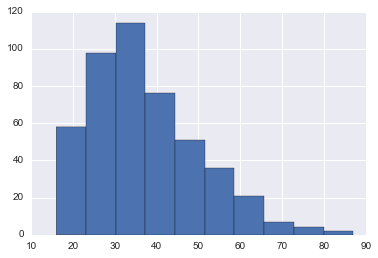

In [128]:
killings.age.hist()

In [129]:
# 11. Show 6 histograms of ages by race

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9EB780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF64C88>]], dtype=object)

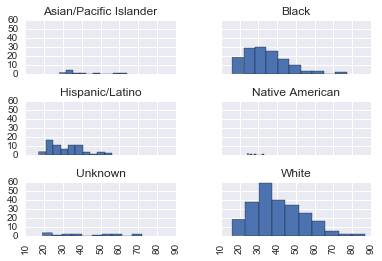

In [130]:
killings.age.hist(by=killings.race, sharex=True, sharey=True)

In [131]:
# 12. What is the average age of death by race?

In [132]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

In [133]:
# 13. Show a bar chart with counts of deaths every month

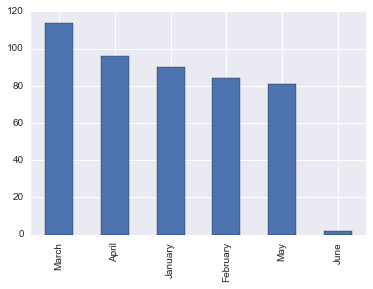

In [134]:
killings.month.value_counts().plot(kind = 'bar')

In [135]:
###################
### Less Morbid ###
###################

In [136]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [137]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [138]:
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [139]:
# 2. Show the cout of missing values in each column

In [140]:
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [141]:
# 3. What are the top 10 highest paying majors?

In [144]:
df = majors[['Major','Median']].sort_values(by='Median').tail(10)

In [145]:
df

,Major,Median
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,85000
45,CHEMICAL ENGINEERING,86000
48,ELECTRICAL ENGINEERING,88000
97,MATHEMATICS AND COMPUTER SCIENCE,92000
56,MINING AND MINERAL ENGINEERING,92000
58,NUCLEAR ENGINEERING,95000
55,METALLURGICAL ENGINEERING,96000
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,97000
154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,106000
59,PETROLEUM ENGINEERING,125000


In [146]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

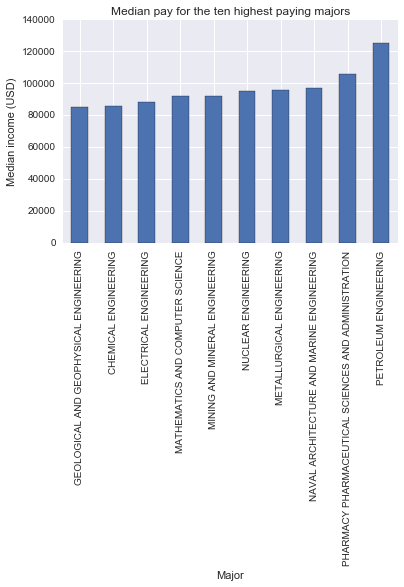

In [152]:
df.plot(x = 'Major', y='Median', kind = 'bar',\
        title='Median pay for the ten highest paying majors',legend = None)
plt.xlabel('Major')
plt.ylabel('Median income (USD)')


In [ ]:
# 5. What is the average median salary for each major category?

In [153]:
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [ ]:
# 6. Show only the top 5 paying major categories

In [154]:
majors.groupby('Major_category').Median.mean().sort_values().tail(5)

Major_category
Health                     56458.333333
Business                   60615.384615
Physical Sciences          62400.000000
Computers & Mathematics    66272.727273
Engineering                77758.620690
Name: Median, dtype: float64

In [155]:
# 7. Plot a histogram of the distribution of median salaries

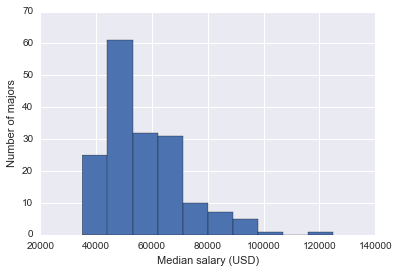

In [156]:
majors.Median.hist()
plt.ylabel('Number of majors')
plt.xlabel('Median salary (USD)')

In [157]:
# 8. Plot a histogram of the distribution of median salaries by major category

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000120D9DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000012FBB828>]], dtype=object)

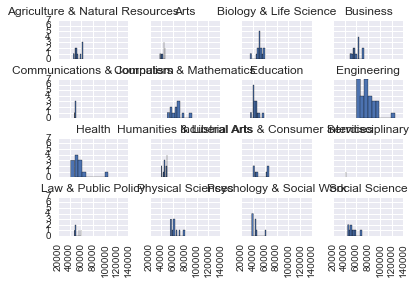

In [158]:
majors.Median.hist(by=majors.Major_category, sharex = True, sharey = True)

In [159]:
# 9. What are the top 10 most UNemployed majors?

In [160]:
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate').tail(10)

,Major,Unemployment_rate
11,ARCHITECTURE,0.085991
104,ASTRONOMY AND ASTROPHYSICS,0.086022
119,SOCIAL PSYCHOLOGY,0.087336
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
141,VISUAL AND PERFORMING ARTS,0.094658
77,LIBRARY SCIENCE,0.094843
27,SCHOOL STUDENT COUNSELING,0.101746
93,MILITARY TECHNOLOGIES,0.101796
116,CLINICAL PSYCHOLOGY,0.102712
146,MISCELLANEOUS FINE ARTS,0.156147


In [161]:
# What are the unemployment rates?

In [162]:
majors[['Major','Unemployment_rate']].sort_values(by='Unemployment_rate').tail(10)

,Major,Unemployment_rate
11,ARCHITECTURE,0.085991
104,ASTRONOMY AND ASTROPHYSICS,0.086022
119,SOCIAL PSYCHOLOGY,0.087336
19,COMPUTER PROGRAMMING AND DATA PROCESSING,0.090264
141,VISUAL AND PERFORMING ARTS,0.094658
77,LIBRARY SCIENCE,0.094843
27,SCHOOL STUDENT COUNSELING,0.101746
93,MILITARY TECHNOLOGIES,0.101796
116,CLINICAL PSYCHOLOGY,0.102712
146,MISCELLANEOUS FINE ARTS,0.156147


In [163]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [164]:
majors.groupby('Major_category').Unemployment_rate.mean().sort_values().tail(5)

Major_category
Communications & Journalism    0.069125
Humanities & Liberal Arts      0.069429
Interdisciplinary              0.077269
Psychology & Social Work       0.077867
Arts                           0.087601
Name: Unemployment_rate, dtype: float64

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [165]:
new_col = majors.Employed.astype(float)/majors.Total
majors['sample_employment_rate'] = new_col
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738


In [166]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [167]:
majors['sample_unemployment_rate'] = 1 - majors.sample_employment_rate
majors.head()

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th,sample_employment_rate,sample_unemployment_rate
0,0,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,2423,0.026147,50000,34000,80000.0,0.704225,0.295775
1,1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,2266,0.028636,54000,36000,80000.0,0.806338,0.193662
2,2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,821,0.030248,63000,40000,98000.0,0.775173,0.224827
3,3,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,3619,0.042679,46000,30000,72000.0,0.783948,0.216052
4,4,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,894,0.049188,62000,38500,90000.0,0.711738,0.288262
